<a href="https://colab.research.google.com/github/kimdonggyu2008/SKT_FLY_AI_6/blob/main/14_nn_bin_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

In [46]:
!wget https://raw.githubusercontent.com/devdio/flyai_datasets/refs/heads/main/diabetes.csv

--2025-01-02 07:20:35--  https://raw.githubusercontent.com/devdio/flyai_datasets/refs/heads/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.2’

diabetes.csv.2      100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2025-01-02 07:20:36 (14.9 MB/s) - ‘diabetes.csv.2’ saved [23873/23873]



In [47]:
df=pd.read_csv('diabetes.csv')

#데이터 분리

In [48]:
x=df.drop('Outcome',axis=1)

In [49]:
y=df['Outcome']

In [50]:
x.shape, y.shape

((768, 8), (768,))

In [51]:
df.value_counts('Outcome')

,count
Outcome,
0,500
1,268


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

#데이터 전처리

In [55]:
x_train.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


# 스케일링

In [56]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(x_train) #스케일러 학습
x_train_s=ss.transform(x_train) #변환, 넘파이 배열로 변경됨

In [57]:
x_train_s[:10]

array([[-0.85135507, -0.98013068, -0.40478372, -0.55397256, -0.33131928,
        -0.60767846,  0.31079384, -0.79216928],
       [ 0.35657564,  0.16144422,  0.46536842,  0.392787  , -0.52639809,
        -0.30213902, -0.11643851,  0.56103382],
       [-0.5493724 , -0.50447447, -0.62232176,  1.21331196,  0.14244354,
         0.3725939 , -0.76486207, -0.70759409],
       [-0.85135507,  0.7956525 , -0.73109078, -1.31138021, -0.73076636,
        -0.28940821,  0.26231357, -0.36929331],
       [-1.15333775, -0.82157861, -0.29601471,  1.15019465,  0.24462767,
         1.60748245, -0.33762972, -0.96131967],
       [ 0.35657564,  2.15920031, -0.29601471,  0.77149083,  2.28831041,
        -0.09844607,  0.31988389, -0.36929331],
       [-1.15333775,  0.54196919, -0.51355274,  0.89772544,  0.82057463,
         0.33440147,  0.17141307, -1.04589487],
       [ 0.96054099,  1.81038575,  0.79167548, -1.31138021, -0.73076636,
         1.00913439, -0.4436803 ,  0.64560901],
       [-0.5493724 , -0.98013068

In [59]:
x_test_s=ss.transform(x_test)

In [60]:
type(y_train_s)

numpy.ndarray

In [61]:
from keras import layers

model=keras.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(units=5,activation='relu'),
    layers.Dense(units=3,activation='relu'),
    #이진 분류라 sigmoid 사용
    layers.Dense(units=1,activation='sigmoid'),
])

In [84]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']
    )

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
epochs=100
batch_size=32

hist=model.fit(
    x_train_s,
    y_train,
    epochs=epochs,
    batch_size=batch_size)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7911 - loss: 0.4392
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7992 - loss: 0.4151 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8011 - loss: 0.4062 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7667 - loss: 0.4543 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7899 - loss: 0.4263  
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7769 - loss: 0.4446 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8128 - loss: 0.4066 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7917 - loss: 0.4475 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7902 - loss: 0.4346  
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7774 - loss: 0.4576 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7874 - loss: 0.4340  
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7908 - loss: 0.4498 
Epoch 13/100
20/20 ━━━━

In [68]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='train_acc')
    plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()


KeyError: 'val_loss'

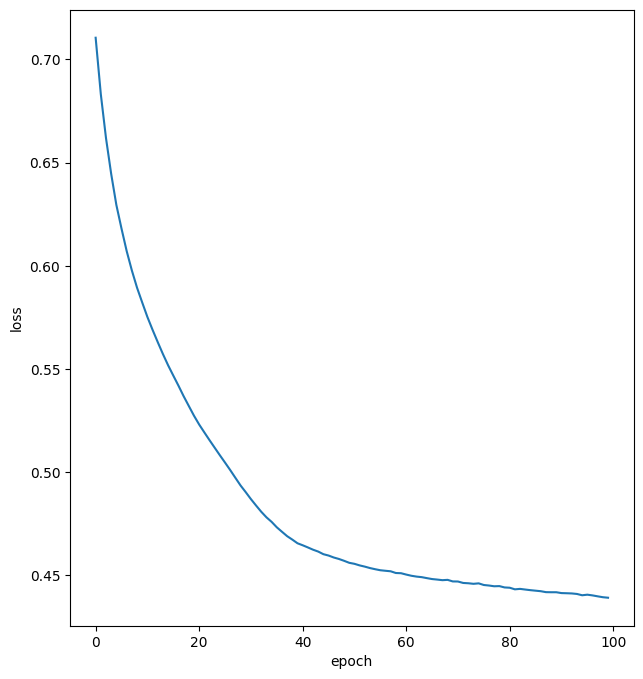

In [69]:
plot_history(hist)

#테스트

In [71]:
x_test_s=ss.transform(x_test)

In [74]:
y_pred=model.predict(x_test_s)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [75]:
y_pred

array([[7.76799142e-01],
       [2.61089265e-01],
       [1.94608331e-01],
       [3.59708816e-01],
       [8.09917052e-04],
       [2.56168216e-01],
       [3.58640611e-01],
       [9.22923088e-01],
       [3.81859839e-02],
       [8.14819515e-01],
       [3.77335101e-01],
       [7.60779321e-01],
       [3.77656855e-02],
       [1.48062818e-02],
       [2.18242377e-01],
       [3.93081516e-01],
       [6.71953619e-01],
       [2.65419260e-02],
       [8.80414546e-01],
       [3.28403980e-01],
       [3.67261648e-01],
       [7.16532350e-01],
       [8.27059224e-02],
       [8.19230080e-01],
       [5.07777870e-01],
       [2.55307853e-02],
       [7.07975447e-01],
       [1.49875795e-02],
       [3.67784947e-01],
       [1.28847435e-02],
       [1.51004810e-02],
       [2.48916112e-02],
       [5.45246303e-01],
       [6.61747873e-01],
       [8.11010063e-01],
       [6.86502680e-02],
       [2.81705379e-01],
       [4.98716086e-02],
       [7.63578057e-01],
       [4.29813832e-01],


In [72]:
hist=model.evaluate(x_test_s,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7337 - loss: 0.5348  


In [79]:
(y_pred.reshape(-1) > 0.5).astype(int)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

#평가지표

In [81]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def print_metrics(y_true,y_pred):
  acc=accuracy_score(y_true,y_pred)
  re=recall_score(y_true,y_pred,average='macro')
  pre=precision_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  print("acc:",acc)
  print("re:",re)
  print("pre:",pre)
  print("f1:",f1)
  cfm=confusion_matrix(y_true,y_pred)
  s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()


acc: 0.7662337662337663
re: 0.7433333333333333
pre: 0.7433333333333333
f1: 0.7433333333333333


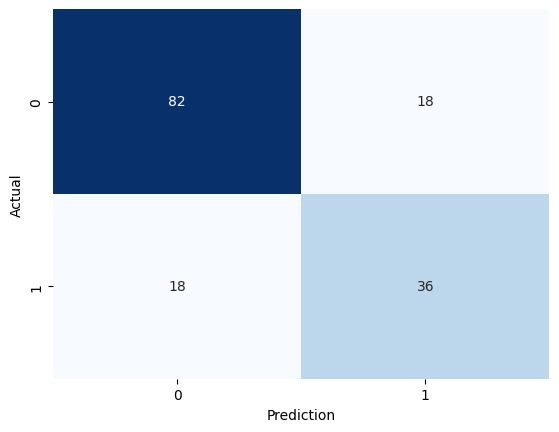

In [83]:
print_metrics(y_test,(y_pred.reshape(-1) > 0.5).astype(int))